---
# PREPARATION

In [ ]:
import tensorflow as tf
import tensorflow.keras.backend as K
import numpy as np
from tensorflow.keras import layers
from tensorflow.keras import layers, Model
import os
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
import string
import re

In [ ]:
tf.__version__

'2.4.1'

In [ ]:
#pip install --upgrade tensorflow

In [ ]:
#drive.mount("/gdrive", force_remount=True)

In [ ]:
#from google.colab import drive
#drive.mount('/gdrive')
#%cd /gdrive/MyDrive/'Colab Notebooks'/
#%ls

In [ ]:
def save_dataset(dataset,fileName):
  path = os.path.join('./tfDatasets/', fileName)
  tf.data.experimental.save(dataset, path)

def load_dataset(fileName):
  path = os.path.join("./tfDatasets/", fileName)
  new_dataset = tf.data.experimental.load(path,
      tf.TensorSpec(shape=(), dtype=tf.string))
  return new_dataset

---
# Character Level Text Generation with an LSTM Model


This tutorial is the **fifth** part of the "**Text Generation in Deep Learning with Tensorflow & Keras**" series.

In this series, we have been covering all the  topics related to Text Generation with sample implementations in **Python, Tensorflow & Keras**.

In this tutorial, we will focus on how to **build a Language Model using Keras LSTM layer for Character Level Text Generation**.

**First**, we will download a sample  corpus (text file). 

**After** opening the file, we will apply the TensorFlow input pipeline that we have developed in **Part B** to prepare the training dataset by ***preprocessing*** and ***splitting*** the text into input character sequence (X) and output character (y).

**Then,** we will design an LSTM-based Language Model and train it using the train set.

**Later on,** we will apply several sampling methods that we have implemented in **Part D** to generate text and observe the effect of these sampling methods on the generated text.

Thus, **in the end**, we will have a trained LSTM-based Language Model for character-level text generation with three sampling methods.


If you would like to learn more about **Deep Learning** with practical coding examples, please subscribe to [Murat Karakaya Akademi YouTube Channel](https://www.youtube.com/channel/UCrCxCxTFL2ytaDrDYrN4_eA)  or follow [my blog on Medium](https://medium.com/@kmkarakaya). Do not forget to turn on **notifications** so that you will be notified when new parts are uploaded.

You can access this **Colab Notebook** using the link given in the video description below.

If you are ready, let's get started!



## [Text Generation in Deep Learning with Tensorflow & Keras Series:](https://kmkarakaya.medium.com/text-generation-in-deep-learning-with-tensorflow-keras-e403aee375c1)

**Part A**: Fundamentals 

**Part B**: Tensorflow Data Pipeline for Character Level Text Generation

**Part C**: Tensorflow Data Pipeline for Word Level Text Generation

**Part D**: Sampling in Text Generation

**Part E**: ***Recurrent Neural Network (LSTM) Model for Character Level Text Generation***

**Part F**: Encoder-Decoder Model for Character Level Text Generation

**Part G**: Recurrent Neural Network (LSTM) Model for Word Level Text Generation

**Part H**: Encoder-Decoder Model for Word Level Text Generation


You can **watch** all these parts on [Murat Karakaya Akademi channel on YouTube](https://www.youtube.com/channel/UCrCxCxTFL2ytaDrDYrN4_eA) in **[ENGLISH](https://youtube.com/playlist?list=PLQflnv_s49v9QOres0xwKyu21Ai-Gi3Eu)** or **[TURKISH](https://youtube.com/playlist?list=PLQflnv_s49v-oEYNgoqK5e4GyUbodfET3)**

I **assume** that ***you have already watched all previous parts***.

Please **ensure** that ***you have reviewed*** the previous parts in order to utilize this part better.



## References

[What is a Data Pipeline?](https://www.alooma.com/blog/what-is-a-data-pipeline)


[tf.data: Build TensorFlow input pipelines](https://www.tensorflow.org/guide/data)


[Text classification from scratch](https://keras.io/examples/nlp/text_classification_from_scratch/)

[Working with Keras preprocessing layers](https://keras.io/guides/preprocessing_layers/)

[Character-level text generation with LSTM](https://keras.io/examples/generative/lstm_character_level_text_generation/)


[Toward Controlled Generation of Text](https://arxiv.org/abs/1703.00955)

[Attention Is All You Need](https://arxiv.org/abs/1706.03762)

[Talk to Transformer](https://app.inferkit.com/demo)

[What is the difference between word-based and char-based text generation RNNs?](https://datascience.stackexchange.com/questions/13138/what-is-the-difference-between-word-based-and-char-based-text-generation-rnns)

[The survey: Text generation models in deep learning](https://www.sciencedirect.com/science/article/pii/S1319157820303360)

[Generative Adversarial Networks for Text Generation](https://becominghuman.ai/generative-adversarial-networks-for-text-generation-part-1-2b886c8cab10)

[FGGAN: Feature-Guiding Generative Adversarial Networks for Text Generation](https://ieeexplore.ieee.org/abstract/document/9091179)

[How to sample from language models](https://towardsdatascience.com/how-to-sample-from-language-models-682bceb97277)

[How to generate text: using different decoding methods for language generation with Transformers](https://huggingface.co/blog/how-to-generate)

[Hierarchical Neural Story Generation](https://arxiv.org/abs/1805.04833)

[How to sample from language models](https://towardsdatascience.com/how-to-sample-from-language-models-682bceb97277)

[Text generation with LSTM](https://jjallaire.github.io/deep-learning-with-r-notebooks/notebooks/8.1-text-generation-with-lstm.nb.html)

[A guide to language model sampling in AllenNLP](https://medium.com/ai2-blog/a-guide-to-language-model-sampling-in-allennlp-3b1239274bc3)

[Generating text from language model](https://stats.stackexchange.com/questions/501496/generating-text-from-language-model)

[How to Implement a Beam Search Decoder for Natural Language Processing](https://machinelearningmastery.com/beam-search-decoder-natural-language-processing/)

[Controllable Neural Text Generation](https://lilianweng.github.io/lil-log/2021/01/02/controllable-neural-text-generation.html)


In [ ]:
#@title Video

from IPython.display import HTML

# Youtube
#HTML('<iframe width="400" height="300" src="https://www.youtube.com/embed/E_kpn3QjGNw?rel=0&amp;controls=0&amp;showinfo=0" frameborder="0" allowfullscreen></iframe>')

# What is a Character Level Text Generation?
A **Language Model** can be trained to generate text **character-by-character**. In this case, each of the **input** and **output** tokens is a **character**. Moreover, Language Model outputs **a conditional probability distribution** over **character set**.

For more details, please check [Part A.](https://medium.com/mlearning-ai/text-generation-in-deep-learning-with-tensorflow-keras-f7cfd8d65d9e)

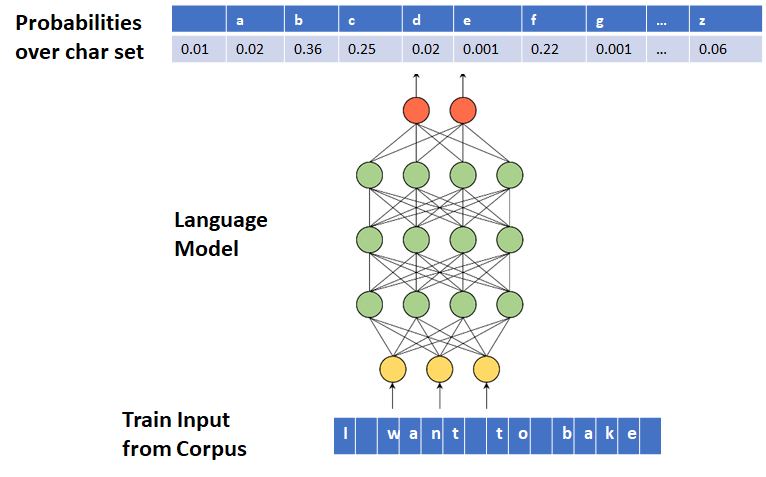

---
# 1. BUILD A TENSORFLOW INPUT PIPELINE 
For more information please refer to **Part B: Tensorflow Data Pipeline for Character Level Text Generation** on Youtube ( [ENGLISH](https://www.youtube.com/playlist?list=PLQflnv_s49v9QOres0xwKyu21Ai-Gi3Eu) / [TURKISH](https://www.youtube.com/playlist?list=PLQflnv_s49v-oEYNgoqK5e4GyUbodfET3)) or [Medium](https://medium.com/deep-learning-with-keras/text-generation-in-deep-learning-with-tensorflow-keras-e403aee375c1).

## What is a Data Pipeline?

Data Pipeline is an **automated** process that involves in **extracting**, **transforming**, **combining**, **validating**, and **loading** data for further analysis and visualization. 

It provides **end-to-end** velocity by ***eliminating*** errors and ***combatting*** bottlenecks or latency. 

It can process **multiple** data streams at once. 

In short, it is an **absolute necessity** for today’s data-driven solutions.

If you are **not familiar** with data pipelines, you can check my tutorials in [English](https://youtube.com/playlist?list=PLQflnv_s49v_m6KLMsORgs9hVIvDCwDAb) or [Turkish](https://youtube.com/playlist?list=PLQflnv_s49v8l8dYU01150vcoAn4sWSAm).


---
## What will we do in this Text Data pipeline?







We will create a data pipeline to **prepare training data for character-level text generator**.

Thus, in the pipeline, we will
* **open** & **load** corpus (text file)
* **convert** the text into sequence of characters
* **remove** unwanted characters such as punctuations, HTML tags, white spaces, etc.
* **generate** input (X) and output (y) pairs as character sequences
* **concatenate** input (X) and output (y) into train data
* **cache, prefetch, and batch** the train data for performance

---
## Input for the TensorFlow Pipeline

In [ ]:
# For English text
#!curl -O https://s3.amazonaws.com/text-datasets/nietzsche.txt

In [ ]:
# For Turkish text
!curl -O https://raw.githubusercontent.com/kmkarakaya/ML_tutorials/master/data/mesnevi_Tumu.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 2586k  100 2586k    0     0  4685k      0 --:--:-- --:--:-- --:--:-- 4685k


---
## TensorFlow Pipeline

In [ ]:
batch_size = 64
#raw_data_ds = tf.data.TextLineDataset(["nietzsche.txt"])
raw_data_ds = tf.data.TextLineDataset(["mesnevi_Tumu.txt"])

In [ ]:
text=""
for elem in raw_data_ds:
   text=text+(elem.numpy().decode('utf-8'))

In [ ]:
chars = sorted(list(set(text)))
print("Total disctinct chars:", len(chars))

Total disctinct chars: 96


In [ ]:
# cut the text in semi-redundant sequences of maxlen characters
maxlen = 20
step = 3
input_chars = []
next_char = []

In [ ]:
for i in range(0, len(text) - maxlen, step):
    input_chars.append(text[i : i + maxlen])
    next_char.append(text[i + maxlen])

In [ ]:
print("Number of sequences:", len(input_chars))
print("input X  (input_chars)  --->   output y (next_char) ")

for i in range(5):
  print( input_chars[i],"   --->  ", next_char[i])



Number of sequences: 778952
input X  (input_chars)  --->   output y (next_char) 
1. Dinle, bu ney nas    --->   ı
Dinle, bu ney nasıl     --->   ş
le, bu ney nasıl şik    --->   â
 bu ney nasıl şikâye    --->   t
 ney nasıl şikâyet e    --->   d


In [ ]:
X_train_ds_raw=tf.data.Dataset.from_tensor_slices(input_chars)
y_train_ds_raw=tf.data.Dataset.from_tensor_slices(next_char)

In [ ]:
def custom_standardization(input_data):
    lowercase     = tf.strings.lower(input_data)
    stripped_html = tf.strings.regex_replace(lowercase, "<br />", " ")
    stripped_num  = tf.strings.regex_replace(stripped_html, "[\d-]", " ")
    stripped_punc  =tf.strings.regex_replace(stripped_num, 
                             "[%s]" % re.escape(string.punctuation), "")    
    return stripped_punc

def char_split(input_data):
  return tf.strings.unicode_split(input_data, 'UTF-8')

def word_split(input_data):
  return tf.strings.split(input_data)

In [ ]:
# Model constants.
max_features = 96           # Number of distinct chars / words  
embedding_dim = 16             # Embedding layer output dimension
sequence_length = maxlen       # Input sequence size

In [ ]:
vectorize_layer = TextVectorization(
    standardize=custom_standardization,
    max_tokens=max_features,
    split=char_split, # word_split or char_split
    output_mode="int",
    output_sequence_length=sequence_length,
)

In [ ]:
vectorize_layer.adapt(X_train_ds_raw.batch(batch_size))

In [ ]:
print("The size of the vocabulary (number of distinct characters): ", len(vectorize_layer.get_vocabulary()))

The size of the vocabulary (number of distinct characters):  53


In [ ]:
def vectorize_text(text):
  text = tf.expand_dims(text, -1)
  return tf.squeeze(vectorize_layer(text))

In [ ]:
# Vectorize the data.
X_train_ds = X_train_ds_raw.map(vectorize_text)
y_train_ds = y_train_ds_raw.map(vectorize_text)

X_train_ds.element_spec, y_train_ds.element_spec

(TensorSpec(shape=(20,), dtype=tf.int64, name=None),
 TensorSpec(shape=(20,), dtype=tf.int64, name=None))

In [ ]:
y_train_ds=y_train_ds.map(lambda x: x[0])

In [ ]:
train_ds =  tf.data.Dataset.zip((X_train_ds,y_train_ds))

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.shuffle(buffer_size=512).batch(batch_size, drop_remainder=True).cache().prefetch(buffer_size=AUTOTUNE)

---
## Result of the Data Pipeline: 

In [ ]:
for sample in train_ds.take(1):
  print("input (X) dimension: ", sample[0].numpy().shape, "\noutput (y) dimension: ",sample[1].numpy().shape)

input (X) dimension:  (64, 20) 
output (y) dimension:  (64,)


In [ ]:
for sample in train_ds.take(1):
  print("input (sequence of chars): ", sample[0][0].numpy(), "\noutput (next char to complete the input): ",sample[1][0].numpy())

input (sequence of chars):  [ 3  8  8  5  8  4  7  8  4  2  9  4  2  4 20  2 19  8  9 12] 
output (next char to complete the input):  14


In [ ]:
for sample in train_ds.take(1):
  print("input (sequence of chars): ", decode_sequence (sample[0][0].numpy()), "\noutput (next char to complete the input): ",vectorize_layer.get_vocabulary()[sample[1][0].numpy()])

	 i olmayan hemen sen
input (sequence of chars):  i olmayan hemen sen 
output (next char to complete the input):   


For more information please refer to **Part B: Tensorflow Data Pipeline for Character Level Text Generation** on Youtube ( [ENGLISH](https://www.youtube.com/playlist?list=PLQflnv_s49v9QOres0xwKyu21Ai-Gi3Eu) / [TURKISH](https://www.youtube.com/playlist?list=PLQflnv_s49v-oEYNgoqK5e4GyUbodfET3)) or [Medium](https://medium.com/deep-learning-with-keras/text-generation-in-deep-learning-with-tensorflow-keras-e403aee375c1).

---
# 2. PREPARE SAMPLING METHODS



In Text Generation, **sampling** means randomly **picking** the next token according to the generated **conditional probability distribution**.

That is, after generating the conditional  probability distribution over the set of tokens (*vocabulary*) for the given input sequence, we need to  carefully decide how to **select the next token** (***sample***) from this distribution. 



There are **several methods for sampling** in text generation (see [here](https://towardsdatascience.com/how-to-sample-from-language-models-682bceb97277) and [here](https://huggingface.co/blog/how-to-generate)):


* **Greedy Search (Maximization)** 


* **Temperature Sampling**

* **Top-K Sampling**
* **Top-P Sampling (Nucleus sampling)**

* **Beam Search**

In this tutorial, we will code Greedy Search, Temperature Sampling, and Top-K Sampling. 

For more information about Sampling, please review **Part D: Sampling in Text Generation** on Youtube ( [ENGLISH](https://www.youtube.com/playlist?list=PLQflnv_s49v9QOres0xwKyu21Ai-Gi3Eu) / [TURKISH](https://www.youtube.com/playlist?list=PLQflnv_s49v-oEYNgoqK5e4GyUbodfET3)) or [Medium](https://medium.com/deep-learning-with-keras/text-generation-in-deep-learning-with-tensorflow-keras-e403aee375c1).



In [ ]:
def softmax(z):
   return np.exp(z)/sum(np.exp(z))

In [ ]:
def greedy_search(conditional_probability):
  return (np.argmax(conditional_probability))

In [ ]:
def temperature_sampling (conditional_probability, temperature=1.0):
  conditional_probability = np.asarray(conditional_probability).astype("float64")
  conditional_probability = np.log(conditional_probability) / temperature
  reweighted_conditional_probability = softmax(conditional_probability)
  probas = np.random.multinomial(1, reweighted_conditional_probability, 1)
  return np.argmax(probas)

In [ ]:
def top_k_sampling(conditional_probability, k):
  top_k_probabilities, top_k_indices= tf.math.top_k(conditional_probability, k=k, sorted=True)
  top_k_probabilities= np.asarray(top_k_probabilities).astype("float32")
  top_k_probabilities= np.squeeze(top_k_probabilities)
  top_k_indices = np.asarray(top_k_indices).astype("int32")
  top_k_redistributed_probability=softmax(top_k_probabilities)
  top_k_redistributed_probability = np.asarray(top_k_redistributed_probability).astype("float32")
  sampled_token = np.random.choice(np.squeeze(top_k_indices), p=top_k_redistributed_probability)
  return sampled_token

# 3 A LSTM-BASED LANGUAGE MODEL  FOR TEXT GENERATION

In this tutorial, we will use Keras LSTM layer to create a Language Model for character-level text generation.

## 3.1 Define the model

As we already prepared the training dataset, we need to define the input specs accordingly.

Remember that in train set, the length of the input (X) sequence (**sequence_length**) is 20 tokens (chars). Thus, we provide this info to the **Input** layer.

Next, we add a layer to map those vocab indices into a space of dimensionality '**embedding_dim**'.

After applying **Dropout**, we use an **LSTM** layer to process the sequence and learn to generate the next token by the help of a **Dense** layer.


Here is the complete code:

In [ ]:
inputs = tf.keras.Input(shape=(sequence_length), dtype="int64")
x = layers.Embedding(max_features, embedding_dim)(inputs)  # corpus daki karakter sayisi, her karaktere karsilik gelen sayilarin vaktorunun boyutu 
x = layers.Dropout(0.5)(x)
x = layers.LSTM(128, return_sequences=True)(x)  # lstm cikti boyutu=128, return_sequences=True: lstm in 20 adimda urettigi tum hidden state leri almak istedik, x 2 boyutlu her 20 adim icin 128 lik sayi uretecek
x = layers.Flatten()(x)  # 128*20 lik vektoru duzlestirdik
predictions=  layers.Dense(max_features, activation='softmax')(x)  # sozlukteki karakter sayisi kadar cikti aliriz=max_features
model_LSTM = tf.keras.Model(inputs, predictions,name="model_LSTM")

## 3.2  Compile the model

Since we use **integers to represent the output** (Y), that is; ***we do not use one-hot encoding***, we need to use `sparse_categorical_crossentropy` loss function.

In [ ]:
model_LSTM.compile(loss='sparse_categorical_crossentropy',  # one hot encoding ile dogru etiketi gostermedigimiz icin bunu kullandik
                   optimizer='adam', metrics=['accuracy'])
print(model_LSTM.summary())  # en son cikti 96 cunku corpus da 96 farkli karakter var her karakter icin olasilik dagilimini gosteriyor

Model: "model_LSTM"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 20)]              0         
_________________________________________________________________
embedding (Embedding)        (None, 20, 16)            1536      
_________________________________________________________________
dropout (Dropout)            (None, 20, 16)            0         
_________________________________________________________________
lstm (LSTM)                  (None, 20, 128)           74240     
_________________________________________________________________
flatten (Flatten)            (None, 2560)              0         
_________________________________________________________________
dense (Dense)                (None, 96)                245856    
Total params: 321,632
Trainable params: 321,632
Non-trainable params: 0
__________________________________________________

## 3.3 Train the model

We train the Language Model for 3 epochs.

In [ ]:
model_LSTM.fit(train_ds, epochs=3) 

Epoch 1/3
12171/12171 [==============================] - 204s 14ms/step - loss: 2.7018 - accuracy: 0.2200
Epoch 2/3
12171/12171 [==============================] - 45s 4ms/step - loss: 2.2135 - accuracy: 0.3250
Epoch 3/3
12171/12171 [==============================] - 44s 4ms/step - loss: 2.0907 - accuracy: 0.3635


## 3.4 An Auxillary Function for Decoding Token Index to Characters

We need to convert the given ***token index*** to the ***corresponding character*** for each token in the generated text. Therefore, I prepare the `decode_sequence ()` function as below:

In [ ]:
def decode_sequence (encoded_sequence):  # decode islemi, tam sayilardan olusan sequence i tekrar karakter dizisine donusturuyor 
  deceoded_sequence=[]
  for token in encoded_sequence:
    deceoded_sequence.append(vectorize_layer.get_vocabulary()[token])
  sequence= ''.join(deceoded_sequence)
  print("\t",sequence)
  return sequence


## 3.5 Another Auxillary Function for Generating Text

To generate text with ***various sampling methods***, I prepare the following function. The `generate_text(model, prompt, step)` function takes the **trained Language Model**, the **prompt**, and the **length of the text** to be generated as the parameters. Then, it generates text with **three different sampling methods**.

In [ ]:
def generate_text(model, seed_original, step):
    seed= vectorize_text(seed_original)  # baslangic degeri urettik
    print("The prompt is")
    decode_sequence(seed.numpy().squeeze())  
    

    seed= vectorize_text(seed_original).numpy().reshape(1,-1)
    #Text Generated by Greedy Search Sampling
    generated_greedy_search = (seed)
    for i in range(step):
      predictions=model.predict(seed)
      next_index= greedy_search(predictions.squeeze())
      generated_greedy_search = np.append(generated_greedy_search, next_index)
      seed= generated_greedy_search[-sequence_length:].reshape(1,sequence_length)
    print("Text Generated by Greedy Search Sampling:")
    decode_sequence(generated_greedy_search)

    #Text Generated by Temperature Sampling
    print("Text Generated by Temperature Sampling:")
    for temperature in [0.2, 0.5, 1.0, 1.2]:
        print("\ttemperature: ", temperature)
        seed= vectorize_text(seed_original).numpy().reshape(1,-1)
        generated_temperature = (seed)
        for i in range(step):
            predictions=model.predict(seed)
            next_index = temperature_sampling(predictions.squeeze(), temperature)
            generated_temperature = np.append(generated_temperature, next_index)
            seed= generated_temperature[-sequence_length:].reshape(1,sequence_length)
        decode_sequence(generated_temperature)

    #Text Generated by Top-K Sampling
    print("Text Generated by Top-K Sampling:")
    for k in [2, 3, 4, 5]:
        print("\tTop-k: ", k)
        seed= vectorize_text(seed_original).numpy().reshape(1,-1)
        generated_top_k = (seed)
        for i in range(step):
            predictions=model.predict(seed)
            next_index = top_k_sampling(predictions.squeeze(), k)
            generated_top_k = np.append(generated_top_k, next_index)
            seed= generated_top_k[-sequence_length:].reshape(1,sequence_length)
        decode_sequence(generated_top_k)




We can call the `generate_text()` function by providing the ***trained LM***, a ***prompt*** and the ***sequence length*** of the text to be generated as below.

You can run this method for multiple times to observe the generated text with different sampling methods.

In [ ]:
generate_text(model_LSTM,"Gönlünün sesini dinle ki", 100)

The prompt is
	 gönlünün sesini dinl
Text Generated by Greedy Search Sampling:
	 gönlünün sesini dinlerin de başlarını görür de onun sözlerin de bir arar dedi ki olur dedi ki olur dedi ki olu
Text Generated by Temperature Sampling:
	temperature:  0.2
	 gönlünün sesini dinlerinden de burun dedi ki görürmeye benzer bir kararından de kanarın anlayı anar kalır görürür 
	temperature:  0.5
	 gönlünün sesini dinlerin de halke sesdi de arçak eşmese arla sıkarır dişer vardı de kini değildir ardık inmayını 
	temperature:  1.0
	 gönlünün sesini dinlert bahanılak dee âkınma birbirine da songa ittemek açal soyurdu masta’ların suydu dözmadım sık
	temperature:  1.2
	 gönlünün sesini dinlümğrlüdüronduaydın dinkdince şışıpkcuşı “şahmıdı bötdü büsüncüğe mutakordur ültetinceğim gön
Text Generated by Top-K Sampling:
	Top-k:  2
	 gönlünün sesini dinle korara gönlümün ken değil kaldır dedi kadışında kadır gönlüğü tanra yüzün kalır gönlür derdi d
	Top-k:  3
	 gönlünün sesini dinle ki gittem da içe biler dird

# 4 OBSERVATIONS

## Info about the corpus

* The size of the vocabulary (number of distinct characters):  **34**
* The number of generated sequences: **196980**
* The maximum length of sequences: **20**


Note that this **corpus actually is not sufficient** to generate high-quality texts. However, due to the limitations of the Colab platform (RAM and GPU), I used this corpus for **demonstration purposes**. 

Therefore, please keep in mind these limitations  when considering the generated texts. 

## About the Language Modle
* We implement a single-LSTM-layer model. Thus, we do not expect this simple model to create high-quality texts.
* On the other hand, you can try to improve this model by incrementing the number of LSTM layers, the output dimension of the embedding and LSTM layers, etc.

## Greedy Search
* The method simply ***selects*** the token with the **highest probability** as its next token (*word or char*).

* However, if we always sample the  most likely word, the standard language model training objective causes us to **get stuck in loops** like above.

## Temperature Sampling
* If **temperature** is set to **very low values or 0**, then Temperature Sampling becomes **equivalent** to the **Greedy Search** and results in extremely **repetitive** and **predictable** text.

* With **higher temperatures**, the generated text becomes more **random**, **interesting**, **surprising**, even creative; it may sometimes invent completely new words (*misspelled words*) that sound somewhat **plausible**. 

## Top-k Sampling
* In the studies, it is reported that the top-k sampling appears to **improve quality** by **removing the tail** and making it less likely to go off topic. 

* However in our case, there are not **many tokens** we could sample from reasonably (***broad distribution***).
* Thus, in above examples, Top-K generates texts mostly look like random.

* Therefore, **k** value should be chosen **carefully** with respect to size of token dictionary.


# CONCLUSION:
In this tutorial, we apply the following steps to generate  ***character level*** text generation:
* download a corpus
* apply the **Tensorflow Data Pipeline** 
* create a Language Model based on LSTM layer
* use three sampling method

[In the next parts](https://kmkarakaya.medium.com/text-generation-in-deep-learning-with-tensorflow-keras-e403aee375c1), we will see 


* Part E: **Encoder-Decode**r Model for **Character** Level Text Generation

* Part F: Recurrent Neural Network (LSTM) Model for Word Level Text Generation

* Part G: Encoder-Decoder Model for Word Level Text Generation
